**Project on Lung Cancer Detection Using Machine Learning**

Overview:
This project demonstrates the process of lung cancer detection using machine learning algorithms. The dataset used contains images classified into three categories: Benign, Malignant, and Normal. We explore various machine learning models such as Random Forest, Support Vector Machine (SVM), and Logistic Regression to classify these images and evaluate their performance

**1. Install Required Libraries:**


In [ ]:
import os
import cv2
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**2. Dataset Extraction and Loading Images** :



 Next, extract the dataset from a zip file, load images, and preprocess them.

In [ ]:
import zipfile
import os

zip_file_name = "ds.zip"

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

# Check if the extraction was successful
print("Files extracted to /content/dataset")
os.listdir("/content/dataset")


Files extracted to /content/dataset


['The IQ-OTHNCCD lung cancer dataset', 'Test cases']

**3. OOP Implementation:**






Defining a DatasetProcessor class: Handles dataset extraction, loading and preprocessing.


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# DatasetProcessor Class
class DatasetProcessor:
    def __init__(self, benign_dir, malignant_dir, normal_dir, image_size=(128, 128)):
        self.benign_dir = benign_dir
        self.malignant_dir = malignant_dir
        self.normal_dir = normal_dir
        self.image_size = image_size

    def load_images_from_dir(self, directory, label):
        images, labels = [], []
        for filename in os.listdir(directory):
            if filename.endswith(('.jpg', '.png')):
                img_path = os.path.join(directory, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, self.image_size)
                    images.append(img)
                    labels.append(label)
        return images, labels

    def load_data(self):
        # Load images from each directory
        benign_images, benign_labels = self.load_images_from_dir(self.benign_dir, label=0)
        malignant_images, malignant_labels = self.load_images_from_dir(self.malignant_dir, label=1)
        normal_images, normal_labels = self.load_images_from_dir(self.normal_dir, label=2)

        # Combine and preprocess
        images = benign_images + malignant_images + normal_images
        labels = benign_labels + malignant_labels + normal_labels
        return np.array(images), np.array(labels)


print(f"Benign cases: {len(benign_images)}")
print(f"Malignant cases: {len(malignant_images)}")
print(f"Normal cases: {len(normal_images)}")


Benign cases: 120
Malignant cases: 561
Normal cases: 416


**4. Split dataset into training and testing sets:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


**5. Visualize the Dataset:**




Visualize some sample images from each category to understand the dataset better.


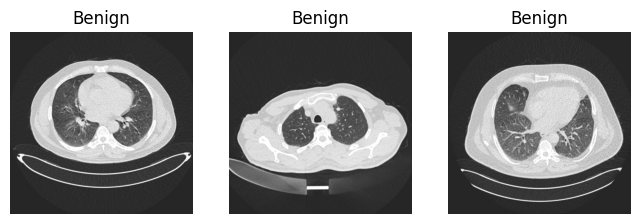

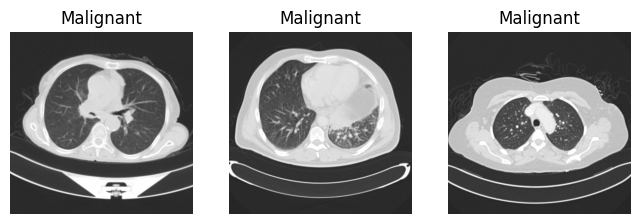

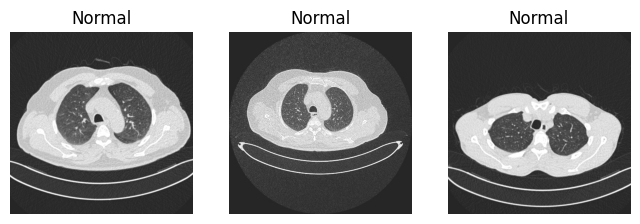

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

categories = {
    "Benign": benign_dir,
    "Malignant": malignant_dir,
    "Normal": normal_dir
}

for category, image_dir in categories.items():

    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.png'))]

    # Create subplots for each category
    fig, ax = plt.subplots(1, 3, figsize=(8, 8))
    ax = ax.ravel()

    for i, img_path in enumerate(np.random.choice(image_paths, size=3, replace=False)):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title(category)

    plt.show()

**6. Count for each class label:**

In [ ]:
# Create a DataFrame with the counts of each category
count_data = pd.DataFrame({
    "label": ["Benign", "Malignant", "Normal"],
    "count": [len(benign_images), len(malignant_images), len(normal_images)]
})

fig = px.histogram(data_frame=count_data, x="label", y="count", color="label")

fig.show()

**7. Train Random Forest Model:**




Train the Random Forest classifier and evaluate its performance.


In [ ]:
X = np.array(images)
y = np.array(labels)

X_flat = X.reshape(X.shape[0], -1) #Flatten the images to 1D

X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Test Accuracy:", accuracy_rf)


Test Accuracy: 0.9545454545454546


**8. Plot Confusion Matrix for Random Forest:**



Visualize the confusion matrix for the Random Forest model.


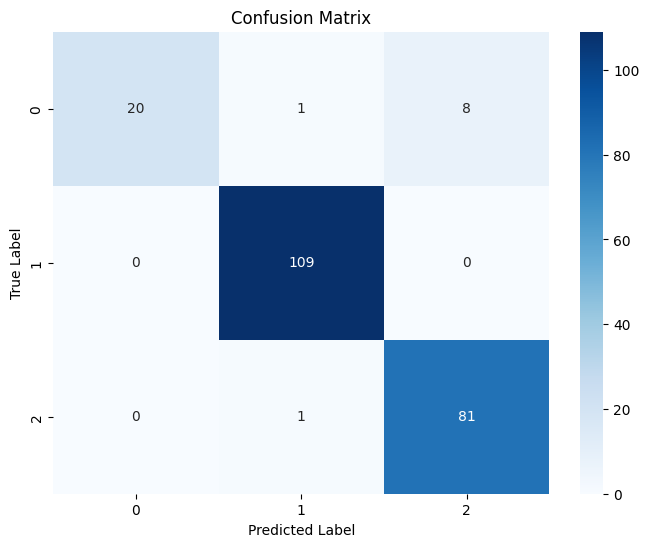

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_test)

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**9. Train Support Vector Machine (SVM):**




Train an SVM classifier and evaluate its performance.


In [ ]:
X, y = make_classification(n_samples=1200, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

np.random.seed(42)
noise_indices = np.random.choice(len(y_train), size=int(0.2 * len(y_train)), replace=False)
y_train[noise_indices] = np.random.randint(0, 3, size=len(noise_indices))

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Test Accuracy:", test_accuracy_svm)

Test Accuracy: 0.925


**10. Plot Confusion Matrix for SVM:**



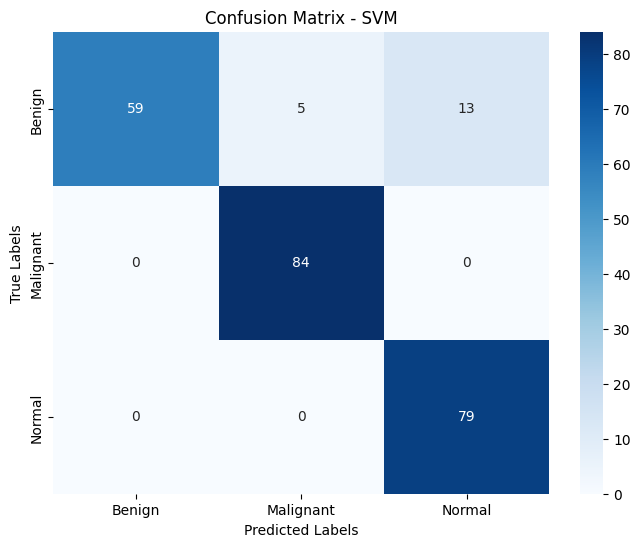

In [ ]:
svm_cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant', 'Normal'], yticklabels=['Benign', 'Malignant', 'Normal'])
plt.title("Confusion Matrix - SVM")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**11. Use PCA to plot decision boundary:**

Test Accuracy: 0.845


<ipython-input-57-dddddd8f5329>:35: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



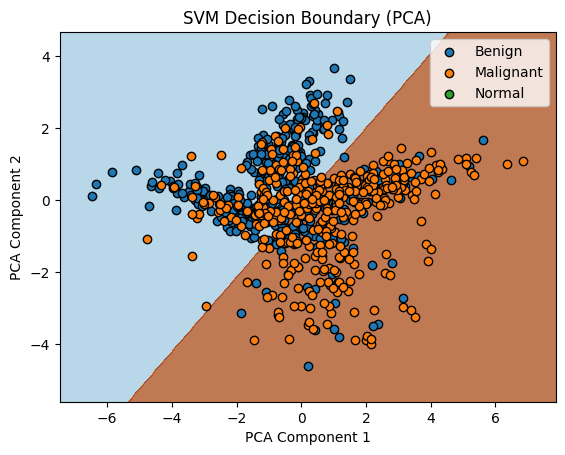

In [ ]:
#SVM Visualization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce feature space to two dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_classifier.fit(X_train_pca, y_train)

y_pred = svm_classifier.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


class_labels = ['Benign', 'Malignant', 'Normal']

# Plot decision boundary
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points with labels
for i in range(len(class_labels)):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1],
                edgecolors='k', cmap=plt.cm.Paired, label=class_labels[i])



plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary (PCA)')
plt.legend()
plt.show()

**12. Logistic Regression Model:**



Train a Logistic Regression classifier and evaluate it.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Introduce noise to the training data
np.random.seed(42)
noise_indices = np.random.choice(len(y_train), size=int(0.2 * len(y_train)), replace=False)
y_train[noise_indices] = 1 - y_train[noise_indices]

logistic_regression = LogisticRegression(max_iter=1000, C=1.0)

logistic_regression.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_lr = logistic_regression.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.845


**13. Comparison of Models:**

[0.9545454545454546, 0.925, 0.865]


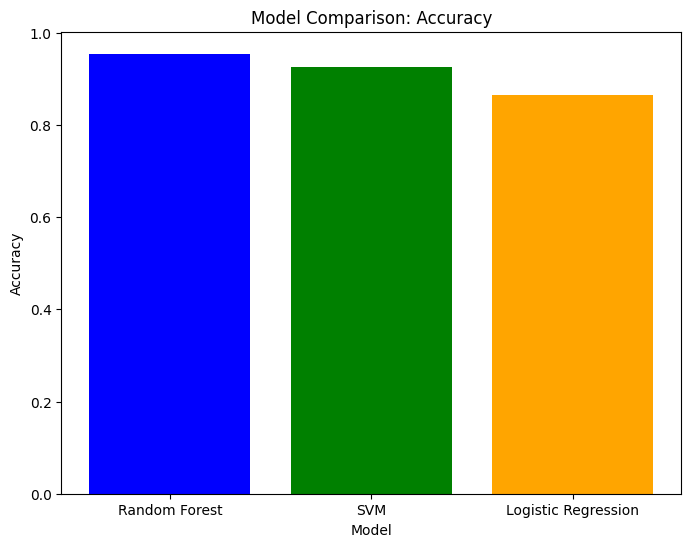

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'SVM', 'Logistic Regression']
accuracies = [accuracy_rf, test_accuracy_svm, test_accuracy_lr]

print(accuracies)
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.show()


**14. Histogram Predictions:**

a) Random Forest

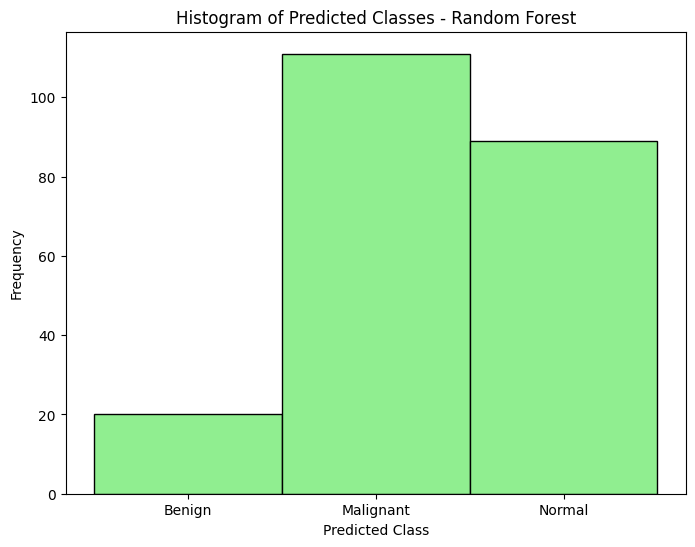

In [ ]:
#Plot a histogram of the predicted classes to understand how the model classifies the test set.

plt.figure(figsize=(8, 6))
plt.hist(y_pred_rf, bins=np.arange(0, 4) - 0.5, edgecolor='black', align='mid', color='lightgreen')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Classes - Random Forest')
plt.xticks([0, 1, 2], ['Benign', 'Malignant', 'Normal'])
plt.show()


b) SVM

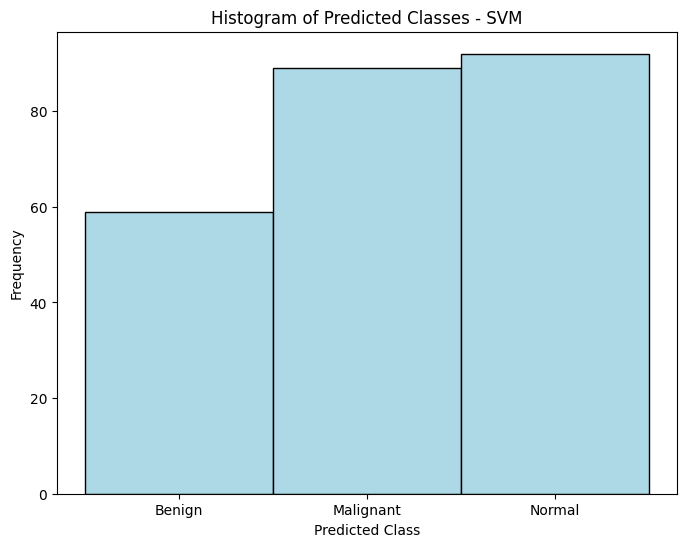

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_svm, bins=np.arange(0, 4) - 0.5, edgecolor='black', align='mid', color='lightblue')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Classes - SVM')
plt.xticks([0, 1, 2], ['Benign', 'Malignant', 'Normal'])
plt.show()

**15) Training vs Test Accuracy in Logistic regression plot:**

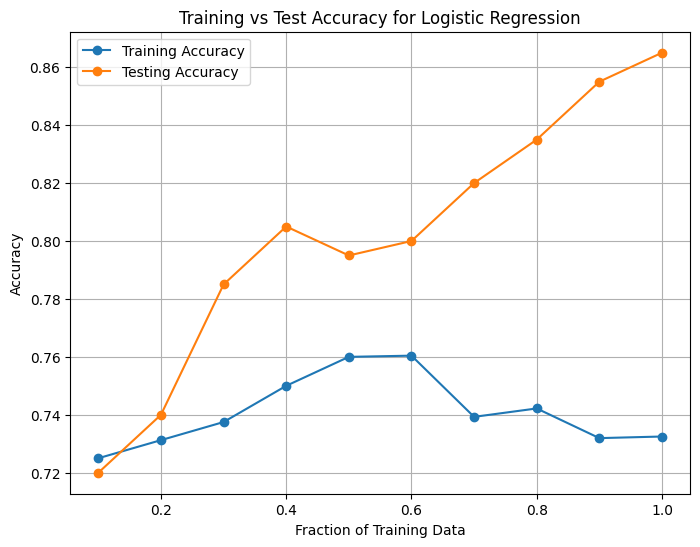

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


train_accuracies = []
test_accuracies = []
fractions = np.linspace(0.1, 1.0, 10)

for frac in fractions:
    size = int(frac * len(X_train))
    logistic_regression.fit(X_train[:size], y_train_noisy[:size])

    # Calculate accuracies
    train_acc = accuracy_score(y_train_noisy[:size], logistic_regression.predict(X_train[:size]))
    test_acc = accuracy_score(y_test, logistic_regression.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(8, 6))
plt.plot(fractions, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(fractions, test_accuracies, label="Testing Accuracy", marker='o')
plt.xlabel("Fraction of Training Data")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()
